## Observations and Insights 

In [85]:
%matplotlib widget

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [86]:
# Checking the number of mice.
mouse_count = len(mouse_study_df['Mouse ID'].value_counts())
mouse_count

249

In [87]:
#first drop all duplicate rows of data held in the dataset
duplicates = mouse_study_df.duplicated()
cleaned_mouse_study_df = mouse_study_df.drop_duplicates()

#next drop duplicates within the Mouse ID category that have the same Timpoint.  Keep the latest entry.
cleaned_mouse_study_df = cleaned_mouse_study_df.drop_duplicates(
                        subset=['Mouse ID', 'Timepoint'],
                        keep = 'last').reset_index(drop = True)
cleaned_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [88]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_mouse_study_df['Mouse ID'].value_counts())
cleaned_mouse_count

249

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
cleaned_mouse_study_df.head()
regimen_table = cleaned_mouse_study_df.groupby('Drug Regimen').sum()
tumor_mean = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean
tumor_meadian = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_meadian
tumor_variance = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_variance
tumor_stddev = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_stddev
tumor_SEM = cleaned_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_SEM
tumor_summary_df = pd.merge(tumor_mean, tumor_meadian, on='Drug Regimen')
tumor_summary_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean (mm3)",'Tumor Volume (mm3)_y':'Tumor Volume Median (mm3)'}, inplace = True)
tumor_summary_df = pd.merge(tumor_summary_df,tumor_variance, on='Drug Regimen')
tumor_summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance (mm3)"}, inplace = True)
tumor_summary_df = pd.merge(tumor_summary_df,tumor_stddev, on='Drug Regimen')
tumor_summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std Dev"}, inplace = True)
tumor_summary_df = pd.merge(tumor_summary_df,tumor_SEM, on='Drug Regimen')
tumor_summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM (mm3)"}, inplace = True)
tumor_summary_df
#regimen_table = pd.DataFrame(regimen_table)
#regimen_table
#tumor_mean = np.mean(regimen_table.iloc[:,3])
#tumor_mean = regimen_table['Tumor Volume (mm3)']
#tumor_mean
#cleaned_mouse_study_df['Tumor Volume (mm3)'].describe()
#tumor_meadian = cleaned_mouse_study_df['Tumor Volume (mm3)'].median()
#tumor_stddev = cleaned_mouse_study_df['Tumor Volume (mm3)'].std()
#tumor_variance = cleaned_mouse_study_df['Tumor Volume (mm3)'].
#tumor_sem = cleaned_mouse_study_df['Tumor Volume (mm3)'].SEM()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Std Dev,Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_table = cleaned_mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
regimen_table
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

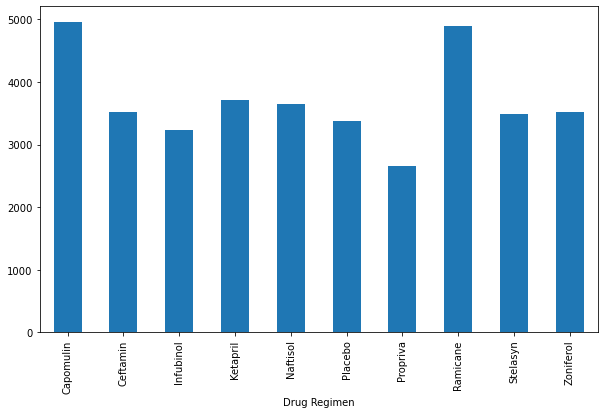

In [158]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_table['Timepoint'].plot(kind="bar", figsize = (10,6))





Text(0.5, 1.0, 'Time Timepoints Observed per Drug Regimen')

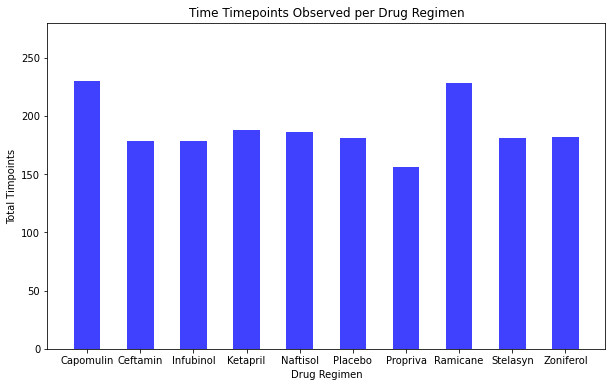

In [357]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

fig = plt.figure(figsize=(10,6))
regimen_table = cleaned_mouse_study_df.groupby('Drug Regimen').count()
regimen_table
drugs = regimen_table.index
timepoints = regimen_table['Timepoint']
timepoints
plt.bar(drugs, timepoints, color = 'blue', width = .5, alpha = .75, align = 'center')
plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(timepoints)+50)
tick_locations = [value for value in drugs]
plt.xticks(tick_locations, drugs)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timpoints')
plt.title('Time Timepoints Observed per Drug Regimen')


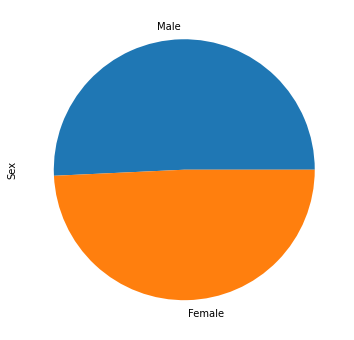

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_mouse_study_df['Sex'].value_counts().plot(kind='pie',figsize=(10,6))


([<matplotlib.patches.Wedge at 0x2517c0256a0>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

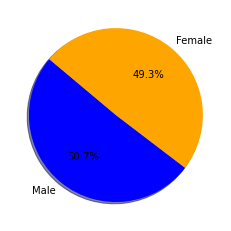

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = cleaned_mouse_study_df['Sex'].value_counts()
labels = gender_df.index
labels
explode=(0,0)
colors = ['blue','orange']
plt.pie(gender_df,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [282]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_values = []
mice = cleaned_mouse_study_df['Mouse ID']
# Start by getting the last (greatest) timepoint for each mouse
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
max_timepoints_ids=cleaned_mouse_study_df.groupby('Mouse ID')['Timepoint'].max()
mice_max_df = pd.merge(cleaned_mouse_study_df, max_timepoints_ids, on = "Mouse ID")
mice_max_df
mice_max_df.rename(columns={'Timepoint_y':'Max Timepoint'}, inplace = True)
mice_max_df.head(15)
# tiny_df = mice_max_df['Drug Regimen'].loc[(mice_max_df['Drug Regimen'] == 'Capomulin') +
#     (mice_max_df['Drug Regimen'] == 'Ramicane') +
#     (mice_max_df['Drug Regimen'] == 'Infubinol') +
#     (mice_max_df['Drug Regimen'] == 'Ceftamin')]
# tiny_df



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [355]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_values = []
mouse_IDs = []
drug = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
rangelength = int(len(mice_max_df['Mouse ID'])) - 1
x=0
for drugs in treatments:
    x=0
    for x in range(0, rangelength):
        if drugs == mice_max_df['Drug Regimen'][x]:
            if mice_max_df['Timepoint_x'][x] == mice_max_df['Max Timepoint'][x]:
                tumor_values.append(mice_max_df['Tumor Volume (mm3)'][x])
                mouse_IDs.append(mice_max_df['Mouse ID'][x])
                drug.append(mice_max_df['Drug Regimen'][x])
                x+=1
        else:
            x+=1
tumor_values_boxplot = tumor_values
tumor_values = pd.DataFrame(tumor_values)

mouse_IDs = pd.DataFrame(mouse_IDs)
drug = pd.DataFrame(drug)
tumor_values
tumor_volumes = pd.merge(tumor_values, mouse_IDs, right_index = True, left_index = True)
tumor_volumes = pd.merge(tumor_volumes, drug, right_index = True, left_index = True)
tumor_volumes.rename(columns={'0_x':'Tumor_Volume (mm3)', '0_y':'Mouse ID','0':'Drug Regimen'}, inplace = True)
tumor_volumes.head()


    # add subset 
    
    
    # Determine outliers using upper and lower bounds
quartiles = tumor_volumes['Tumor_Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Values below {lower_bound} could be potential outliers")
print(f"Values above {upper_bound} could be potential outliers")
#tumor_values_boxplot
quartiles



Values below 3.0739668737499812 could be potential outliers
Values above 94.04403868375002 could be potential outliers


0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor_Volume (mm3), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x25100513ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2510064a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x25100513a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2517a421940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2517c0b7518>],
 'means': []}

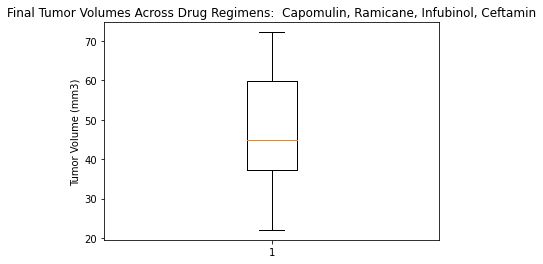

In [354]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_values_boxplot.sort()
tumor_values_boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Across Drug Regimens:  Capomulin, Ramicane, Infubinol, Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_values_boxplot)

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185, Capomulin Drug Regimen, Tumor Reduction Results')

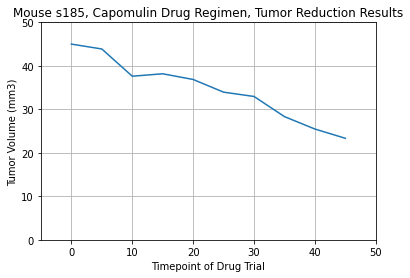

In [381]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 's185'
tumor_volumes = []
timepoints = []
single_mouse_df = mice_max_df.loc[(mice_max_df["Mouse ID"] == mouse_id),:]
tumor_volumes = single_mouse_df['Tumor Volume (mm3)']
timepoints = single_mouse_df['Timepoint_x']
plt.plot(timepoints, tumor_volumes)
plt.grid()
plt.xlim(-5,50)
plt.ylim(0,50)
plt.xlabel("Timepoint of Drug Trial")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185, Capomulin Drug Regimen, Tumor Reduction Results")



Text(0.5, 1.0, 'Mouse Weight vs Tumor Volume (mm3)')

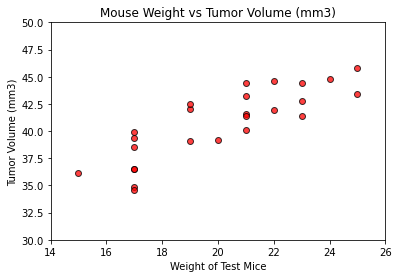

In [395]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_max_df
weight = []
tumor_volumes = []
capomulin_df = mice_max_df.loc[(mice_max_df['Drug Regimen'] == 'Capomulin'),:]
mouse_capomulin_df = capomulin_df.groupby('Mouse ID')
weight = mouse_capomulin_df['Weight (g)'].mean()
tumor_volumes = mouse_capomulin_df['Tumor Volume (mm3)'].mean()



plt.scatter(weight, tumor_volumes, marker = 'o', facecolors = 'red', edgecolors = 'black', alpha = .75)
plt.xlim(14,26)
plt.ylim(30,50)
plt.xlabel("Weight of Test Mice")
plt.ylabel("Averaage Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume (mm3)")



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

